# Predictive Health - Data Exploration and Training

This is the data exploration and training for the Predictive Health project, using machine learning to predict heart disease.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Data Exploration & Cleaning

Data is imported locally. The data can be found at the following URL: [Heart Failure Prediction](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction).

Verify that no null values exist in the dataset. The first few entries are printed to ensure the data was imported correctly.

In [2]:
data_frame = pd.read_csv('./data/heart.csv')
print(data_frame.isnull().sum())
data_frame.head()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


The data is preprocessed by encoding the categorical and binary features. For example, the 'Sex' feature is converted from 'F' or 'M' to 0 or 1 respectively.

In [3]:
data_frame['Sex'] = data_frame['Sex'].map({'F': 0, 'M': 1})
data_frame['ExerciseAngina'] = data_frame['ExerciseAngina'].map({'N': 0, 'Y': 1})

data_frame['ChestPainType'] = data_frame['ChestPainType'].map({'ATA': 0, 'NAP': 1, 'TA': 2, 'ASY': 3})
data_frame['RestingECG'] = data_frame['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
data_frame['ST_Slope'] = data_frame['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

To look for correlations between features, a correlation matrix is plotted. 

<AxesSubplot:>

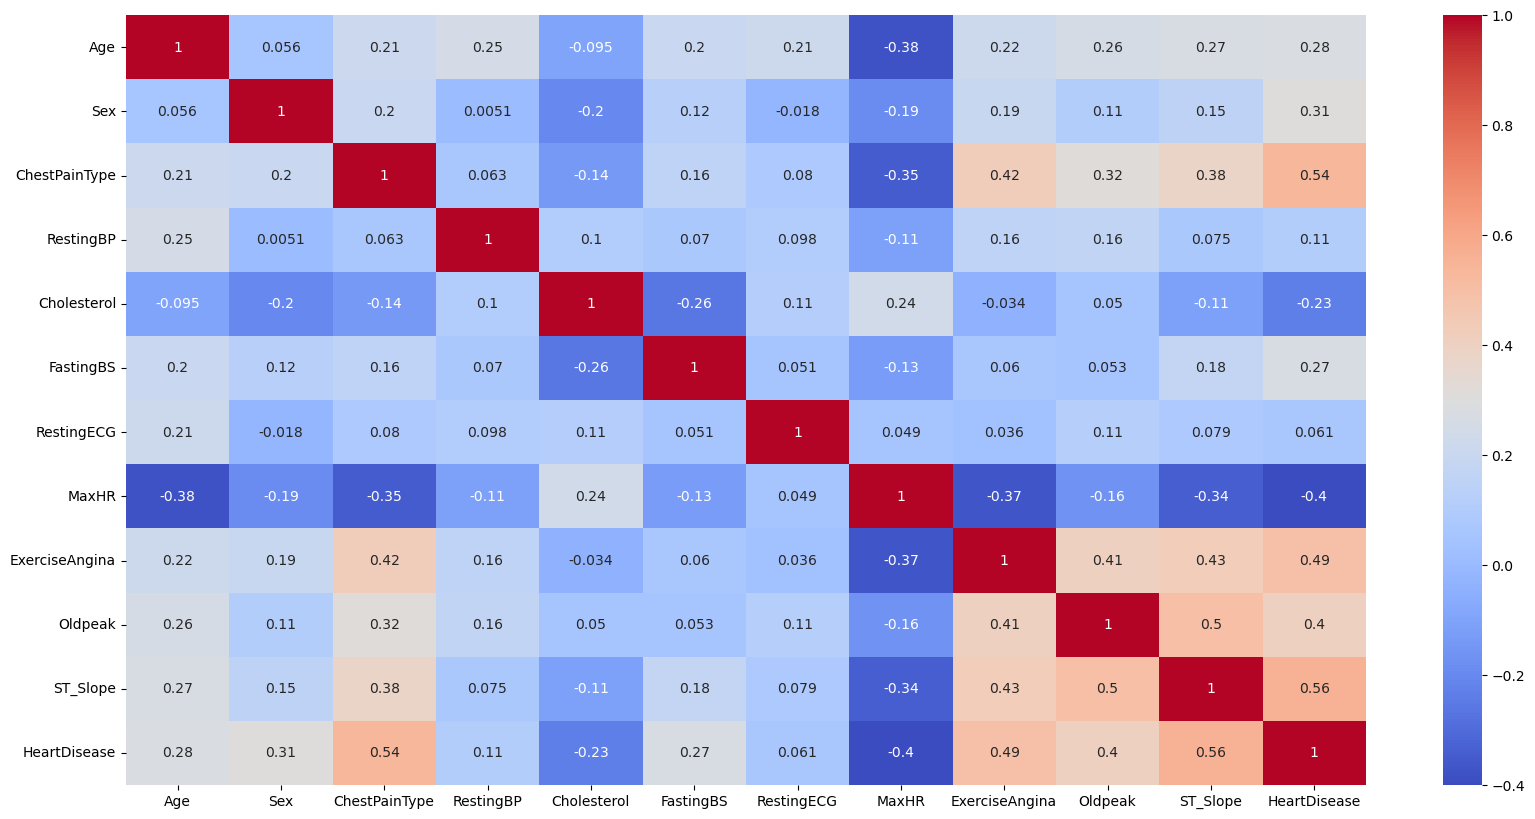

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(data_frame.corr(), annot=True, cmap='coolwarm')

We see the following features have a strong correlation with the target variable, HeartDisease: ChestPainType, ExerciseAngina, Oldpeak, and ST_Slope.

ChestPainType and ST_Slope appear to have a very similar correlation with the target variable. We will drop ST_Slope in the data processing step to avoid multicollinearity.

To further understand the data, we plot each feature against the target variable.

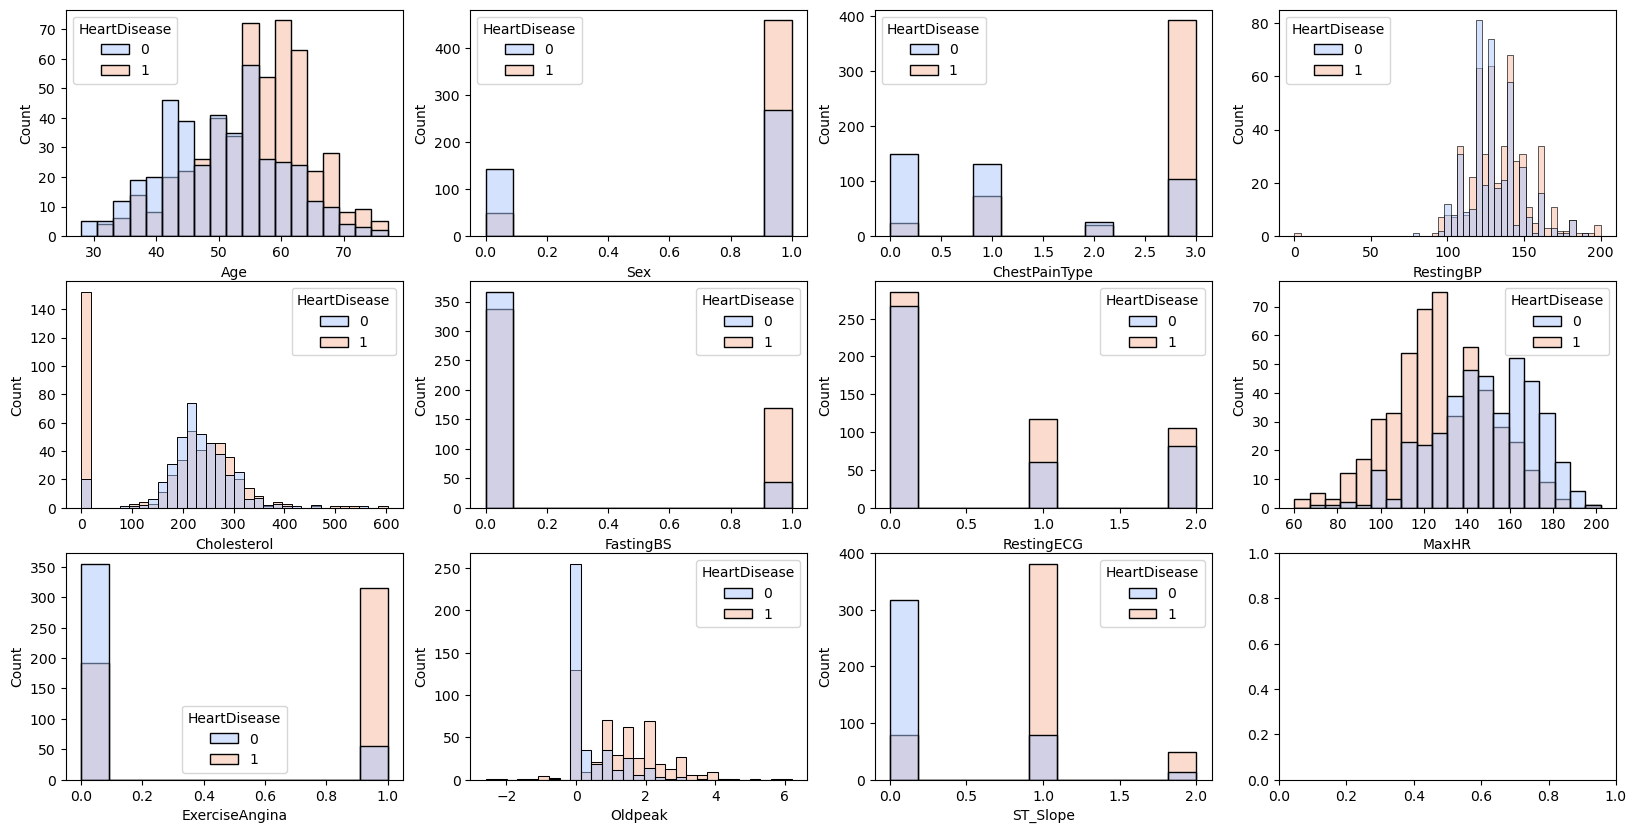

In [5]:
fig, axs = plt.subplots(3, 4, figsize=(20, 10))
i = 1
for feature in data_frame.columns:
    if feature != "HeartDisease":
        plt.subplot(3, 4, i)
        sns.histplot(data=data_frame, x=feature,
                     palette='coolwarm', hue='HeartDisease')
        i += 1


From the overview, we see an issue with one of the features. Cholesterol has many 0 values, which is not possible. This feature will be dropped from the dataset in the next step.

## Data Preprocessing

Drop the the identified features.

In [6]:
data_frame.drop(columns=['Cholesterol', 'ST_Slope'], axis=1)

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,1,0,140,0,0,172,0,0.0,0
1,49,0,1,160,0,0,156,0,1.0,1
2,37,1,0,130,0,1,98,0,0.0,0
3,48,0,3,138,0,0,108,1,1.5,1
4,54,1,1,150,0,0,122,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
913,45,1,2,110,0,0,132,0,1.2,1
914,68,1,3,144,1,0,141,0,3.4,1
915,57,1,3,130,0,0,115,1,1.2,1
916,57,0,0,130,0,2,174,0,0.0,1


A peek at the first few data entries after preprocessing.

In [7]:
data_frame.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


## Model Creation and Training

Create a training and testing set. Create a model and train it on the training set.
Evaluate the model on the testing set.

In [11]:
from sklearn import linear_model, metrics, model_selection

X = data_frame.drop(['HeartDisease'], axis=1)
y = data_frame['HeartDisease']

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2)

log_reg = linear_model.LogisticRegression(solver='lbfgs', max_iter=100)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred)) # ~0.85

0.8695652173913043


We see that the model is 85% accurate. To further understand how the model is performing, we plot a confusion matrix.

Text(95.72222222222221, 0.5, 'Truth')

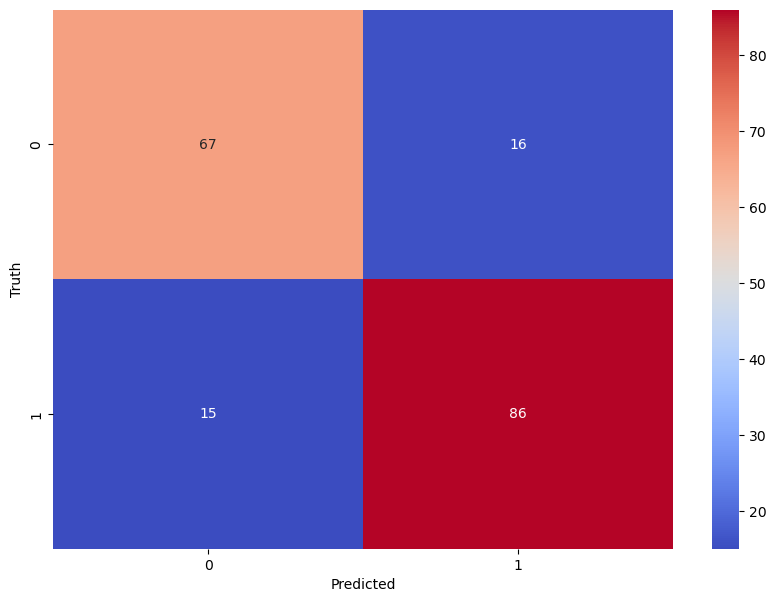

In [9]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')


From the matrix, we see that the model is performing well on positive cases. Our clients have identified that accurate positive predictions are most important, so this model is sufficient for our purposes.

### Save Model


Export the model to a file, so it can be use in the web app.

In [10]:
import pickle

pickle.dump(log_reg, open('./models/log_heart_disease.pkl', 'wb'))
